<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<H1 align='center'> Sistemas Recomendadores </H1>

<H3> INF-479 Reconocimiento de patrones en Minería de Datos (Posgrado) </H3>
<H3> Autores: Francisco Andrades | Lucas Díaz</H3>

Lenguaje: Python

Temas:

    - Recomendación Basada en Usuarios (UBCF)
    - Recomendación Basada en Items (IBCF)
<hr style="height:2px;border:none"/>

In [1]:
#Librerías 
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
np.random.seed(0)

## Datasets Tarea

Para la tarea tendrán a su disposición los siguientes 3 datasets, <b> de las cuales tendrán que escoger 2 para realizar la implementación de su tarea. </b>

   ### 1. MovieLens: 
   Es uno de los datasets más populares de recomendación y recopila las preferencias de usuarios de internet con respecto a películas que son evaluadas de 0 a 5 estrellas. Este dataset ha sido utilizado en diversos estudios de investigación en áreas como la recomendación personalizada y la psicología social.  
* <b>Archivos: </b>
    - ML_ratings.csv: contiene los ratings dados por usuarios a películas. Se compone por las columnas user_id, movie_id y rating. 
    - movies.csv: contiene la metadata sobre las películas. Incluye las columnas movie_id, title y genres (donde se encuentran los géneros de la película separados por "|"). 
 
* <b>Cantidad de ratings</b>: 100836
* <b>Cantidad de usuarios</b>: 610
* <b>Cantidad de películas</b>: 9724
* <b>Calificación</b> 0 a 5 (valores enteros) 

Referencias: [Movielens Dataset](https://grouplens.org/datasets/movielens/) 
   

In [2]:
df_movies = pd.read_csv("ML_ratings.csv")
attr_df_movies = pd.read_csv("movies.csv")

### 2. Book-Crossing: 
Es un datasets de ratings de libros recolectado por Cai-Nicolas Ziegler desde la <i>Book-Crossing community</i>. El dataset original contiene 1,149,780 ratings generados por 278,858 usuarios a 271,379 libros. 

* <b>Archivos</b>: 
    - BX_ratings.csv: contiene los ratings dados por usuarios a diferentes libros. Se compone de las columnas user_id, ISBN (identificador para los libros) y rating.
    - books.csv: contiene los títulos de libros asociados a los códigos ISBN (utilizados como item_id). Se compone de las columnas ISBN y title. 

* <b>Cantidad de ratings</b>: 359263
* <b>Cantidad de usuarios</b>: 10775
* <b>Cantidad de libros</b>: 10773
* <b>Calificación</b>: 0 a 10 (valores enteros)

Referencias: [Book-Crossing Dataset](http://www2.informatik.uni-freiburg.de/~cziegler/BX/)

In [3]:
df_books = pd.read_csv("BX_ratings.csv")
attr_df_books = pd.read_csv("books.csv")

### 3. Jester: 
Es un dataset desarrollado por Ken Goldberg y su equipo en la Universidad de Berkeley, el cual contiene alrededor de 6 millones de ratings con respecto a 150 chistes cortos. 
* <b>Archivos</b>:
    - JT_ratings.csv: contiene los ratings dados por usuarios a diferentes chistes cortos. Se compone por las columnas joke_id, user_id y rating. 
    - jokes.csv: contiene 

* <b>Cantidad de ratings</b>: 199900
* <b>Cantidad de usuarios</b>: 1999
* <b>Cantidad de chistes</b>: 100 
* <b>Calificación</b>: -10 a 10 (valores reales)
    
Referencias: [Jester Dataset](http://eigentaste.berkeley.edu/dataset/)

In [4]:
df_jokes = pd.read_csv("JT_ratings.csv")
attr_df_jokes = pd.read_csv("jokes.csv")

## Instrucciones

<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs11227-020-03266-2/MediaObjects/11227_2020_3266_Fig1_HTML.png" title="Title text" width="60%" />
<center> <i> Figura 1. Collaborative Filtering. </i> </center>

Las recomendaciones obtenidas se obtuvieron cuando en la función interfaz el parámetro custom=False. Para calificar items por consola, debe setearse custom=True.

## 1. User based Collaborative Filtering (40 puntos) 

La primera parte de la tarea constará de las siguientes secciones: 
1. Implementación de un sistema de recomendación de filtro colaborativo basado en usuarios utilizando los k vecinos más cercanos. Para esta parte, se debe utilizar <b> similaridad coseno </b> como medida de similaridad entre el usuario objetivo y el resto de usuarios. Además, el parámetro k debe ser escogido por ustedes. 

2. Se ingresa nuevo usuario al sistema, se le pide que califique 10 productos (a elección) y a partir de eso se le realiza la recomendación de 5 productos que no ha calificado. Es importante que en su procedimiento se muestren las ids de los k vecinos más cercanos.  


In [5]:

def calcular_neighbours(df_useritem, user_u,k):
    df_useritem = df_useritem.copy()
    df_useritem = df_useritem.fillna(0)

    user_u2 = user_u[np.logical_not(np.isnan(user_u))]
    similarities = []
    for cont in range(df_useritem.shape[0]):
        user_v = df_useritem.iloc[cont].values
        user_v = user_v[np.logical_not(np.isnan(user_u))]
        user_v = np.array(user_v.reshape(1,-1),dtype=object)
        similarities.append((cont,cosine_similarity(user_u2.reshape(1,-1), user_v)[0][0]))

    similaridades = sorted(similarities, key=lambda tup: tup[1])[::-1]
    df_return = df_useritem.iloc[np.array(similaridades[:k], dtype=object)[:,0]]
    df_return = df_return.sub(df_return.mean(axis=1), axis=0)
    df_return['similaridad'] = np.array(similaridades[:k], dtype=object)[:,1]
    return df_return


def recomendaciones(array_usuario,df_pivot,k,imprimir):
    array_usuario = array_usuario.copy()
    similaridades = calcular_neighbours(df_pivot,array_usuario,k)
    if imprimir:
        print("Usuarios más cercanos: ",list(similaridades.index))
    mask = np.isnan(array_usuario)
    completar = np.argwhere(mask)
    sim = similaridades['similaridad'].values
    media_usuario = np.mean(array_usuario[np.logical_not(mask)])
    lista = []
    for indice in completar:
        # SE TIENE VALUES RATINGS PELICULA Y VALUES SIMILARIDADES
        #CALCULAR CON LA FORMULA RATING 
        columna = similaridades.iloc[:,indice].values
        valores = columna.squeeze()*sim
        suma = np.sum(valores)
        delta = suma/np.sum(sim)
        lista.append((indice[0],(media_usuario+delta)))
    ratings = sorted(lista, key=lambda tup: tup[1])[::-1]
    recomendar = np.array(ratings)[:5,0]
    id_peliculas = np.array(df_pivot.columns)[recomendar.astype(int)]
    return np.array([elem[1] for elem in id_peliculas])


def recomendar(df_pivot,array_usuario,k,imprimir=True):
    predicciones = recomendaciones(array_usuario,df_pivot,k,imprimir)
    return predicciones

def get_items(attr_df, ordenada2):
    
    retorno = attr_df[attr_df.iloc[:, 0] == ordenada2[0]]
    retorno = retorno.append(attr_df[attr_df.iloc[:, 0] == ordenada2[1]])
    retorno = retorno.append(attr_df[attr_df.iloc[:, 0] == ordenada2[2]])
    retorno = retorno.append(attr_df[attr_df.iloc[:, 0] == ordenada2[3]])
    retorno = retorno.append(attr_df[attr_df.iloc[:, 0] == ordenada2[4]])
    
    return retorno

def interfaz(df,df_map,k,custom = False):
    df_pivot = df.pivot_table(index = df.user_id, columns = df.columns[df.columns != "user_id"][0])
    array_usuario = np.full(df_pivot.shape[1],np.nan)
    if custom is False:
        array_usuario[:10] = [1,2,3,4,5,1,2,3,4,5]
        recomendados = recomendar(df_pivot,array_usuario,k)
        print(recomendados)
        items = get_items(df_map,recomendados)
        return items
    ids = df_pivot.columns.get_level_values(1)
    sample = np.random.choice(ids.shape[0],10,replace=False)
    for cont in sample:
        array_usuario[cont] = input("Califica el item: "+str(ids[cont])+' ')
    
    recomendados = recomendar(df_pivot,array_usuario,k)
    items = get_items(df_map,recomendados)
    return items

def analisis(df):
    df_pivot = df.pivot_table(index = df.user_id, columns = df.columns[df.columns != "user_id"][0])
    array_usuario = np.full(df_pivot.shape[1],np.nan)
    array_usuario[:10] = [1,2,3,4,5,1,2,3,4,5]  
    predicciones = [recomendar(df_pivot,array_usuario,i,False) for i in range(1,20,1)]
    estadistica = []
    unique=[]
    for i in range(len(predicciones)):
        cont = 0
        for elem in predicciones[i]:
            if elem not in unique:
                unique.append(elem)
                cont += 1
        if len(unique) > 10:
            unique = unique[-10:]
        estadistica.append(6-cont)
    plt.bar(range(len(estadistica)),estadistica)
    plt.show()
    return 0

print("Para Movies: ")
preds_movies = interfaz(df_movies, attr_df_books,10, custom=False)
display(preds_movies)

print("Para Jokes:")
preds_jokes = interfaz(df_jokes, attr_df_jokes, 8, custom=False)
display(preds_jokes)

Para Movies: 
Usuarios mÃ¡s cercanos:  [6, 501, 43, 414, 84, 117, 170, 470, 68, 458]
[356 457 377 480 318]


,ISBN,title


Para Jokes:
Usuarios mÃ¡s cercanos:  [1730, 512, 502, 350, 1478, 1033, 106, 1563]
[65 48 10 41 52]


,joke_id,joke_text
65,65,"A lawyer opened the door of his BMW, when sudd..."
48,48,Three engineering students were gathered toget...
10,10,"Q. What do a hurricane, a tornado, and a redne..."
41,41,Two men are discussing the age old question: w...
52,52,One Sunday morning William burst into the livi...


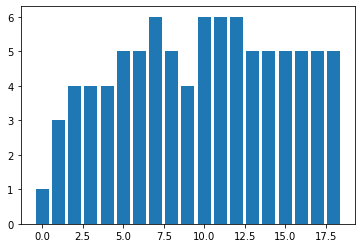

0

In [6]:
#Celda demora 5 min aprox
analisis(df_movies)

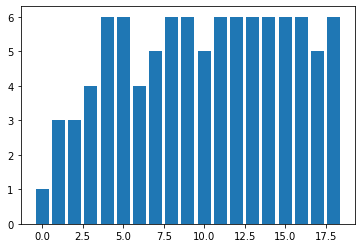

0

In [7]:
analisis(df_jokes)

#### Análisis

Los gráficos muestran lo siguiente:

Para cada k in $range(1,20)$:
    
$$6 - R_k$$

Donde,

$R_k$: Cantidad de items recomendados **que no se han visto nunca para todos los $k_{anteriores} < k$** (con una memoria que sólo incluye los últimos 10 items únicos vistos).

No se ocupa $R_k$ directamente para una mejor visualización.
Mientras más alta la estadística, más "estable" son las recomendaciones (no se están proponiendo recomendaciones nuevas).

In [8]:
df_pivotaux = df_jokes.pivot_table(index = df_jokes.user_id, columns = df_jokes.columns[df_jokes.columns != "user_id"][0])
print("Sparsity para jokes: %", df_pivotaux.isna().sum().sum()/(df_pivotaux.shape[0]*df_pivotaux.shape[1]))
df_pivotaux = df_movies.pivot_table(index = df_movies.user_id, columns = df_movies.columns[df_movies.columns != "user_id"][0])
print("Sparsity para movies: %", df_pivotaux.isna().sum().sum()/(df_pivotaux.shape[0]*df_pivotaux.shape[1])*100)

Sparsity para jokes: % 0.0
Sparsity para movies: % 98.30003169443864


### Para Movies
3. Concluir y responder las siguientes preguntas: 

   >a. ¿Cuáles fueron las 5 recomendaciones obtenidas? Analice y concluya respecto a estos resultados.  
    * Se recomendaron las películas: Forrest Gump (1994), Fugitive, The (1993), Speed (1994), Jurassic Park (1993), Shawshank Redemption, The (1994). Se aprecia una similaridad en los géneros y en las películas (Grandes películas).
    
   >b. ¿Qué cantidad de vecinos cercanos (k) se escogió para la recomendación? ¿En qué influye la elección de este parámetro? ¿Qué sucede a medida que aumenta este parámetro? 
   * Se escogió k = 10, observando el análisis propuesto. Se puede apreciar que la elección de este parámetro afecta de manera significativa cuando k es pequeño y de forma menos relavante a medida que k aumenta.
   A medida que el parámetro aumenta se "estabiliza" la recomendación. La recomendación utilizando (k+n) vecinos tiende a ser igual a la recomendación utilizando k vecinos cuando k >> n.
    
   >c. ¿Cuál era el porcentaje de <i>sparsity</i> de la matriz usuarios-items? ¿Cuáles son las desventajas de este enfoque? 
   * 98% de sparsity (98% de los valores son missing values). La desventaja de este enfoque frente a IBCF es la escalabilidad cuando usuarios >> items, que es el caso más común (Dataset Jokes). Para cada usuario nuevo, se debe computar la similaridad con el resto de usuarios.

### Para Jokes
3. Concluir y responder las siguientes preguntas: 

   >a. ¿Cuáles fueron las 5 recomendaciones obtenidas? Analice y concluya respecto a estos resultados.  
    * Se recomendaron los chistes: Se recomendaron los chistes: 65, 48, 10, 41, 52.
    
   >b. ¿Qué cantidad de vecinos cercanos (k) se escogió para la recomendación? ¿En qué influye la elección de este parámetro? ¿Qué sucede a medida que aumenta este parámetro? 
   * Se escogió k = 8, observando el análisis propuesto. Se puede apreciar que la elección de este parámetro afecta de manera significativa cuando k es pequeño y de forma menos relavante a medida que k aumenta.
   A medida que el parámetro aumenta se "estabiliza" la recomendación. La recomendación utilizando (k+n) vecinos tiende a ser igual a la recomendación utilizando k vecinos cuando k >> n.
    
     >c. ¿Cuál era el porcentaje de <i>sparsity</i> de la matriz usuarios-items? ¿Cuáles son las desventajas de este enfoque? 
     * 0% de sparsity (0% de los valores son missing values). La desventaja de este enfoque frente a IBCF es la escalabilidad cuando usuarios >> items, que es el caso más común (Dataset Jokes). Para cada usuario nuevo, se debe computar la similaridad con el resto de usuarios.


## 2. Item based Collaborative Filtering (40 puntos) 

La segunda parte de la tarea constará de las siguientes secciones: 
1. Implementación de un sistema de recomendación de filtro colaborativo basado en ítems utilizando los k ítems más cercanos. Para esta parte, se debe utilizar <b> similaridad coseno </b> como medida de similaridad entre los ítems. Además, el parámetro k debe ser escogido por ustedes. 

2. Se ingresa nuevo usuario al sistema, se le pide que califique 10 productos (a elección) y a partir de eso se le realiza la recomendación de 5 productos que no ha calificado. Para poder llevar a cabo la recomendación recordar los siguientes pasos:
    >a. Se debe generar la matriz de similaridad entre productos basada en la similaridad coseno.
    
    >b. Para realizar la recomendación, se debe predecir el rating de todos los productos que el usuario nuevo del sistema no haya calificado aún. Para esto, se deben obtener los k ítems más cercanos al ítem a predecir y se debe predecir su rating en base a la <i> weighted sum </i> de los ratings de dichos k ítems. 
    
    >c. Una vez predecidos los ratings para todos los productos sin calificación, se deben recomendar al usuario los 5 productos con mayor rating predecido. 


<i>Importante: Esto debe ser realizado para ambos datasets escogidos</i>

In [9]:
#SOLO CORRER UNA VEZ ESTA CELDA -> VENTAJA DE IBCF B)
def item_matrix_similarity(df):
    df_itemuser = df.copy()
    df_itemuser = df_itemuser.fillna(0)

    return pd.DataFrame(cosine_similarity(df_itemuser))

ITMS_movies = item_matrix_similarity(df_movies.pivot_table(index=df_movies.movie_id, columns=df_movies.user_id))
ITMS_jokes = item_matrix_similarity(df_jokes.pivot_table(index=df_jokes.joke_id, columns=df_jokes.user_id))

In [10]:
def recomendacion(df_pivot, lista_retorno, verbose=False):
    """
    df_pivot     : dataframe pivoteado 
    lista_retorno: lista con todas las predicciones de items no vistos por u
                   (posición_del_item, predicción)
    """
    #se ordena lista de predicciones y se obtienen las con 5 mejores ratings
    ordenada = sorted(lista_retorno, key = lambda x: x[1])[-5:]
    if verbose:
        print("Ordenada1: ", ordenada)
    ordenada2 = df_pivot.index[np.array(ordenada)[:, 0].astype(int)]
    if verbose:
        print("Ordenada2: ", ordenada2)
    ordenada2 = ordenada2.get_level_values(0).values
    return ordenada2

def get_items(attr_df, ordenada2):
    """
    attr_df  : dataframe con info de los items (ej: movies.csv o jokes.csv)
    ordenada2: ids de los 5 items a recomendar
    """
    retorno = attr_df[attr_df.iloc[:, 0] == ordenada2[4]]
    retorno = retorno.append(attr_df[attr_df.iloc[:, 0] == ordenada2[3]])
    retorno = retorno.append(attr_df[attr_df.iloc[:, 0] == ordenada2[2]])
    retorno = retorno.append(attr_df[attr_df.iloc[:, 0] == ordenada2[1]])
    retorno = retorno.append(attr_df[attr_df.iloc[:, 0] == ordenada2[0]])

    return retorno

def item_calcular(df, itms, k):
    """
    df  : dataframe pivoteado item-user
    itms: matriz similaridad para items de df
    k   : vecinos cercanos
    """

    df = df.copy()
    u_itemsvistos = np.array([cont for cont in range(df.shape[0]) if df.iloc[cont, -1] != 0])

    lista_retorno = []
    i = 0
    for cont in range(df.shape[0]): # recorre rows dataframe items-users
        item_j = df.iloc[cont] # item j en row numero cont
        if item_j.values[-1] == 0: # ese item fue visto por u? si no fue visto, entra
            
            item_i = itms.iloc[cont].values # se obtiene row de similaridad del item j con todos los demás
            #similaridades = [item_i[index] for index in u_itemsvistos] #(filtro) similaridad item j con items vistos por user u
            similaridades = item_i[u_itemsvistos]
            
            info = list(zip(u_itemsvistos, similaridades)) #(id_item, similaridad)
            k_vecinos = sorted(info, key = lambda x: x[1])[-k:] #(id_item, similaridad) ordenado por similaridad (x[1])

            item_indexes = list(zip(*k_vecinos))[0] # ids_items
            similarities = list(zip(*k_vecinos))[1] # similaridades

            #cálculo predicción
            num = np.sum(similarities * df['user_u'].iloc[list(item_indexes)].values)
            denom = np.sum(similarities)
            
            #if np.isnan(rating_prediccion) or np.any(np.isclose(similarities, 0)):
            if denom == 0 or np.any(np.isclose(similarities, 0)):
                lista_retorno.append((cont, -1))
                continue
            
            rating_prediccion = num/denom
            lista_retorno.append((cont, rating_prediccion))

    return lista_retorno

def ibcf(df_pivot, array_usuario, k, itms):

    df_pivot = df_pivot.fillna(0)
    #itms = item_matrix_similarity(df_pivot)

    df_pivot['user_u'] = array_usuario
    df_pivot = df_pivot.fillna(0)

    #return get_items(attr_df, recomendacion(df_pivot, item_calcular(df_pivot, itms, k)))
    return recomendacion(df_pivot, item_calcular(df_pivot, itms, k))

In [11]:
np.random.seed(0)
def interfaz(df, df_map, k, itms, custom = False):
    df = df.rename(columns={"movie_id": "item_id", "joke_id": "item_id"})
    df_map = df_map.rename(columns={"movie_id": "item_id", "joke_id": "item_id"})

    df_pivot = df.pivot_table(columns = df.user_id, index = df.item_id)
    array_usuario = np.full(df_pivot.shape[0], np.nan)
    if custom is False:
        array_usuario[:10] = [1,2,3,4,5,1,2,3,4,5]
        recomendados = ibcf(df_pivot, array_usuario, k, itms)
        items = get_items(df_map, recomendados)
        return items
    ids = df_pivot.index.get_level_values(0)
    sample = np.random.choice(ids.shape[0], 10, replace=False)
    for cont in sample:
        array_usuario[cont] = input("Califica el item: "+str(ids[cont])+' ')
    
    recomendados = ibcf(df_pivot, array_usuario, k, itms)
    items = get_items(df_map, recomendados)
    return items

In [12]:
interfaz(df_jokes, attr_df_jokes, 9, ITMS_jokes, False)

,item_id,joke_text
15,15,Q. What is orange and sounds like a parrot? \...
57,57,How many teddybears does it take to change a l...
23,23,What do you get when you run over a parakeet w...
16,16,How many men does it take to screw in a light ...
43,43,"A horse walks into a bar. Bartender says:\n""So..."


In [13]:
interfaz(df_movies, attr_df_movies, 9, ITMS_movies, False)

,item_id,title,genres
100,113,Before and After (1996),Drama|Mystery
165,195,Something to Talk About (1995),Comedy|Drama|Romance
54,61,Eye for an Eye (1996),Drama|Thriller
600,747,"Stupids, The (1996)",Comedy
338,381,When a Man Loves a Woman (1994),Drama|Romance


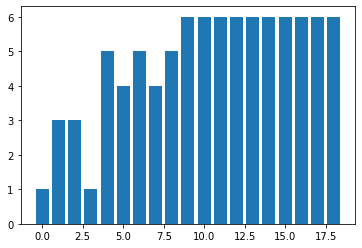

0

In [14]:
def analisis(df, itms):
    df_pivot = df.pivot_table(columns = df.user_id, index = df.columns[df.columns != "user_id"][0])
    array_usuario = np.full(df_pivot.shape[0], np.nan)
    array_usuario[:10] = [1,2,3,4,5,1,2,3,4,5]  
    predicciones = [ibcf(df_pivot, array_usuario, i, itms) for i in range(1, 20, 1)]
    estadistica = []
    unique=[]
    for i in range(len(predicciones)):
        cont = 0
        for elem in predicciones[i]:
            if elem not in unique:
                unique.append(elem)
                cont += 1
        if len(unique) > 10:
            unique = unique[-10:]
        estadistica.append(6-cont)

    plt.bar(range(len(estadistica)),estadistica)
    plt.show()
    return 0

analisis(df_jokes, ITMS_jokes)

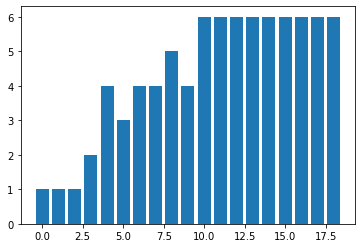

0

In [15]:
#Celda demora 5 min aprox
analisis(df_movies, ITMS_movies)

# Dataset Jokes
3. Concluir y responder las siguientes preguntas: 

   >a. ¿Cuáles fueron las 5 recomendaciones obtenidas? Analice y concluya respecto a estos resultados.  
    * Joke_id = 15
    * Joke_id = 57
    * Joke_id = 23
    * Joke_id = 16
    * Joke_id = 43

   >b. ¿Qué cantidad de vecinos cercanos (k) se escogió para la recomendación? ¿En qué influye la elección de este parámetro? ¿Qué sucede a medida que aumento este parámetro?
    * Se escogieron k=9 vecinos cercanos. La influencia radica en que al cambiarlo la recomendación puede variar. A medida que el parámetro aumenta, las recomendaciones se van estabilizando, es decir, se van recomendando los mismos items. 

   >c. ¿Cuáles son las ventajas de este enfoque respecto al anterior?
    * Si bien se necesita espacio para almacenar la matriz de similaridades, esto permite escalar de buena manera conforme aumentan los datos.  

# Dataset Movies
3. Concluir y responder las siguientes preguntas: 

   >a. ¿Cuáles fueron las 5 recomendaciones obtenidas? Analice y concluya respecto a estos resultados.  
   * Before and after (1996).
   * Something to talk about (1995).
   * Eye for an eye (1996).
   * Stupids, the (1996).
   * When a man loves a woman (1994).

   Todas las películas se asemejan según el(los) género(s) que pertenecen. Lo anterior, de forma directa o de manera transitiva. Además, las películas recomendadas son contemporáneas.
    
   >b. ¿Qué cantidad de vecinos cercanos (k) se escogió para la recomendación? ¿En qué influye la elección de este parámetro? ¿Qué sucede a medida que aumento este parámetro?
    * Se escogieron k=9 vecinos cercanos. La influencia radica en que al cambiarlo la recomendación puede variar. A medida que el parámetro aumenta, las recomendaciones se van estabilizando, es decir, se van recomendando los mismos items. 

   >c. ¿Cuáles son las ventajas de este enfoque respecto al anterior?
    * Si bien se necesita espacio para almacenar la matriz de similaridades, esto permite escalar de buena manera conforme aumentan la cantidad usuarios. 

## 3. Conclusiones finales

1. Analice los resultados obtenidos y contraste ambos enfoques (ubcf y ibcf). 

* Es importante notar que los resultados obtenidos por cada método fueron distintos. Tomando esto en cuenta, sería interesante considerar un ensamblado que utilice ambos enfoques promediados para computar una recomendación final.

2. Analice ventajas y desventajas de ambos enfoques. 
* En el caso más común, presente en el dataset Jokes, que es cuando la cantidad de usuarios >> cantidad items, el método IBCF demostró ser más eficiente, debido a que solo computa la matriz de similaridades 1 vez. Sin embargo, en el caso atípico donde la cantidad de usuarios << cantidad de items, presente en el dataset Movies, el método UBCF demostró ser más eficiente, debido a que IBCF debe hacer el cómputo de los vecinos más cercanos y el análisis posterior **para cada item faltante**.